<a href="https://colab.research.google.com/github/Muneeb2k1/DEP/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [40]:
data = pd.read_csv('/content/ParisHousing.csv')

In [41]:
print(data.head())

   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1     

In [42]:
print(data.tail())

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
9995      9311   1698     218        

In [43]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [45]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [46]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

<Axes: xlabel='price', ylabel='squareMeters'>

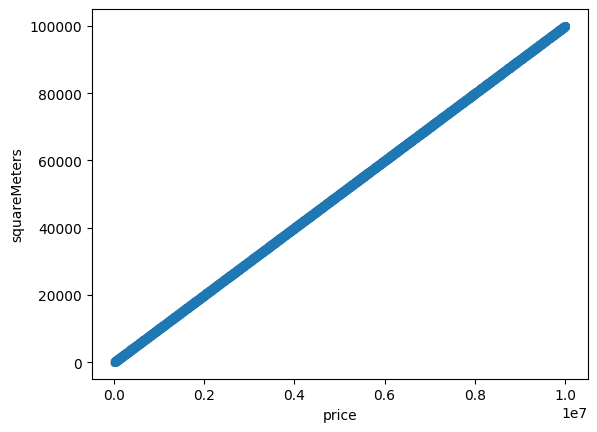

In [47]:
data.plot(kind='scatter', x='price', y='squareMeters', s=30, alpha=0.4)

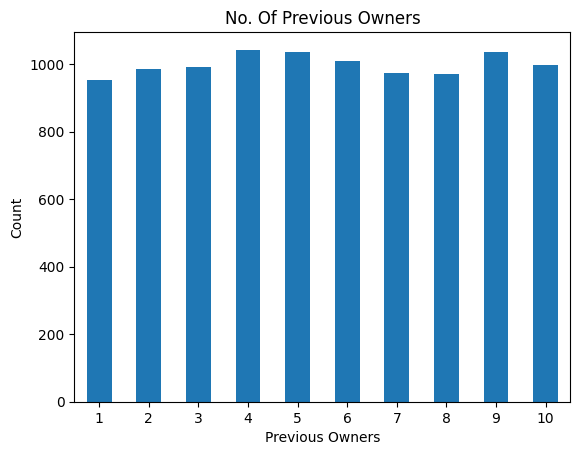

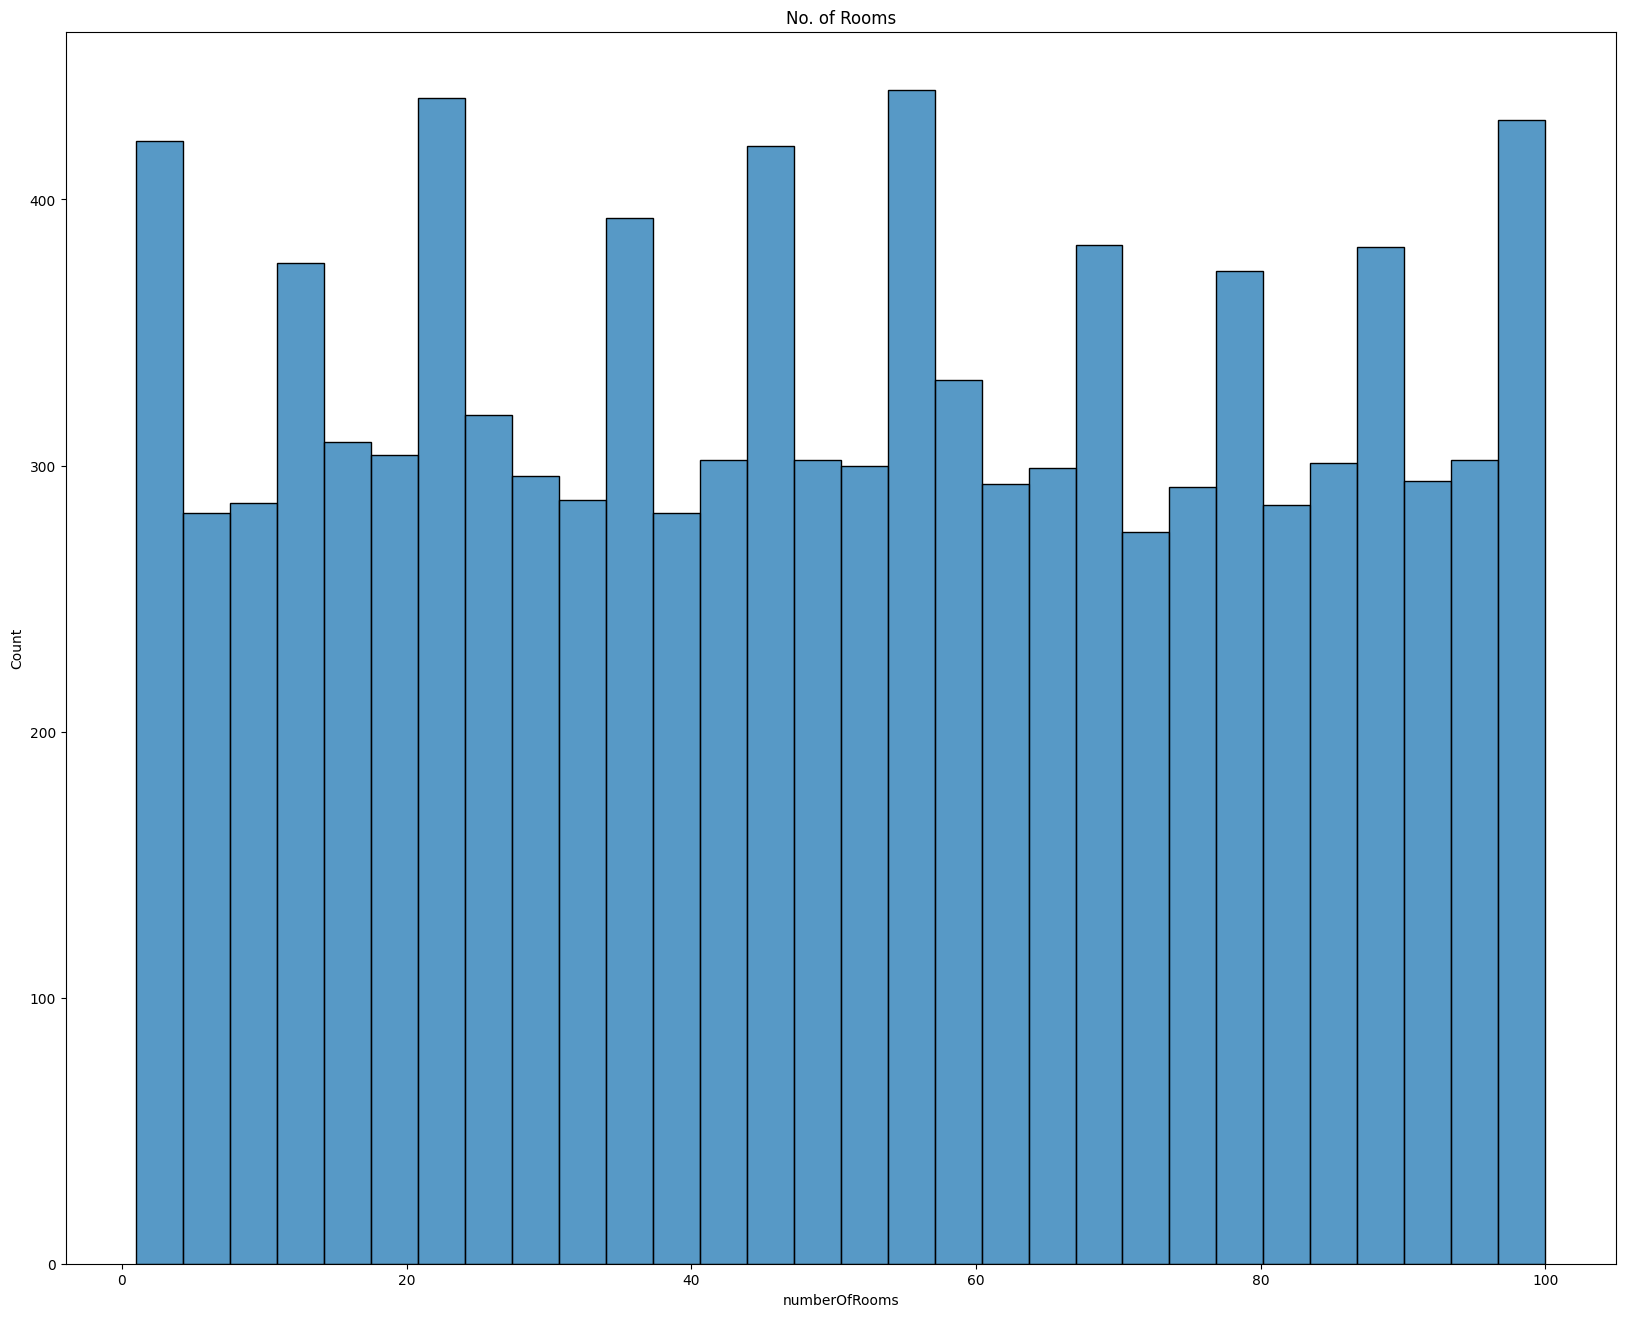

In [48]:
owners_bar = data['numPrevOwners'].value_counts()
owners_bar_sorted = owners_bar.sort_index()
owners_bar_sorted.plot(kind='bar')
plt.title('No. Of Previous Owners')
plt.xlabel('Previous Owners')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(20,16))
sns.histplot(data['numberOfRooms'], bins=30)
plt.title('No. of Rooms')
plt.show()

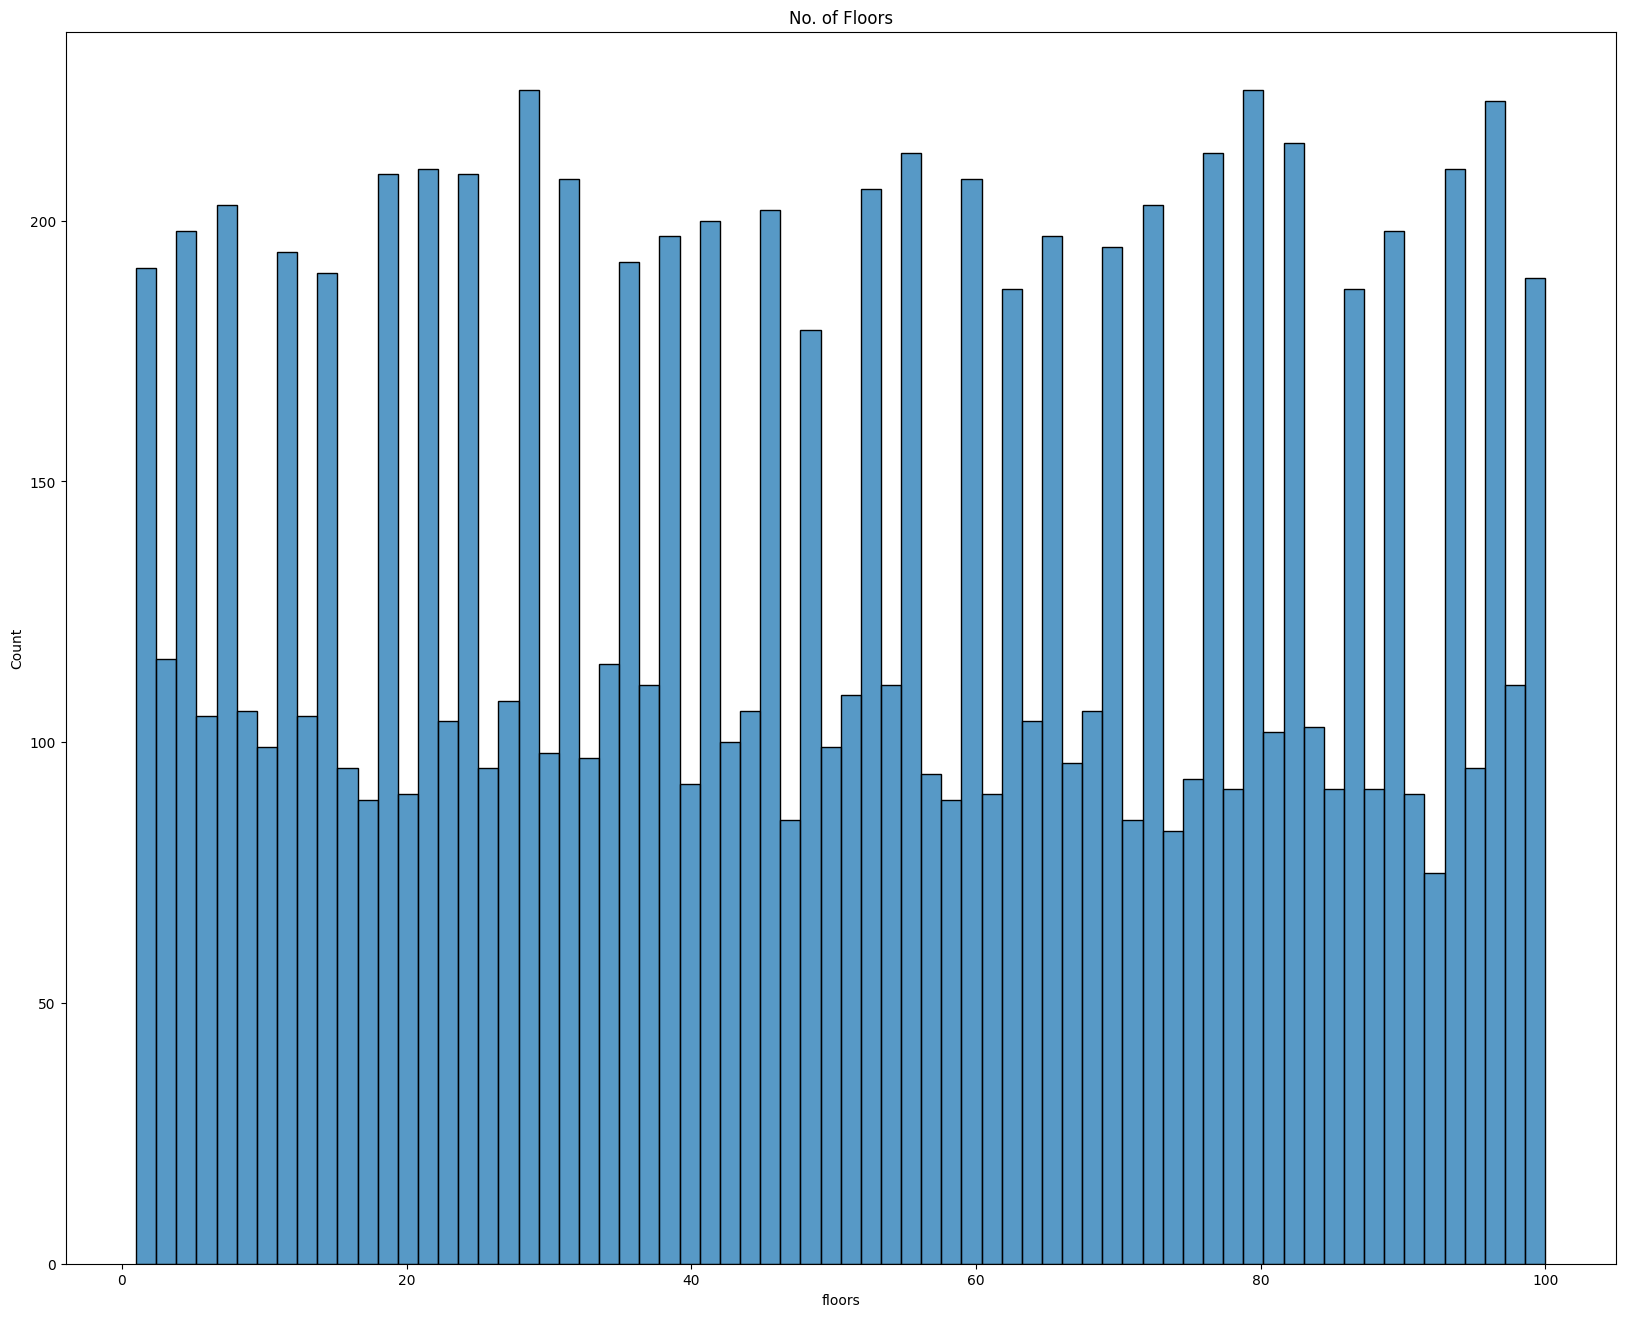

In [49]:
plt.figure(figsize=(20,16))
sns.histplot(data['floors'], bins=70)
plt.title('No. of Floors')
plt.show()

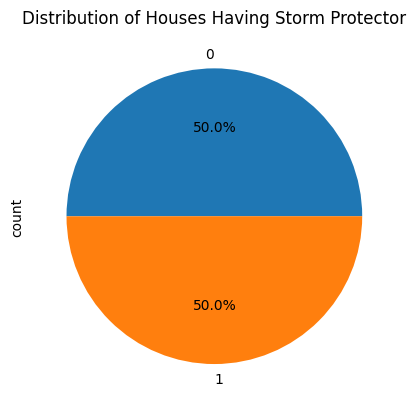

In [50]:
pie_chart = data['hasStormProtector'].value_counts()
pie_chart.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Houses Having Storm Protector')

plt.show()

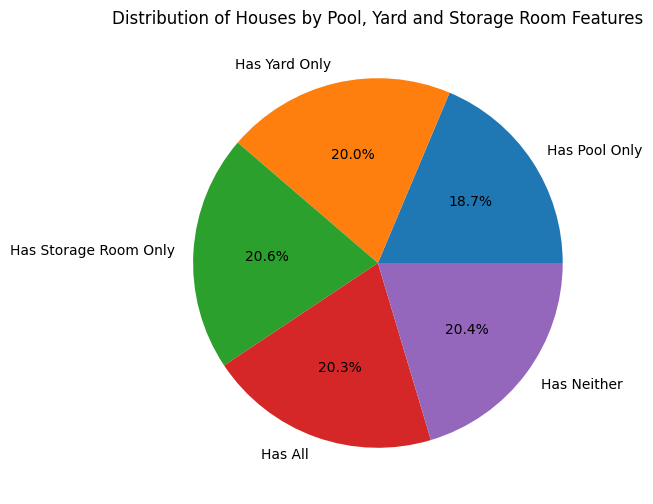

In [51]:
has_pool_only = ((data['hasPool'] == 1) & (data['hasYard'] == 0) & (data['hasStorageRoom'] == 0)).sum()
has_yard_only = ((data['hasPool'] == 0) & (data['hasYard'] == 1) & (data['hasStorageRoom'] == 0)).sum()
has_storage_room_only = ((data['hasPool'] == 0) & (data['hasYard'] == 1) & (data['hasStorageRoom'] == 1)).sum()
has_all = ((data['hasPool'] == 1) & (data['hasYard'] == 1) & (data['hasStorageRoom'] == 1)).sum()
has_neither = ((data['hasPool'] == 0) & (data['hasYard'] == 0)& (data['hasStorageRoom'] == 0)).sum()

pool_yard_counts = pd.DataFrame({'Feature': ['Has Pool Only', 'Has Yard Only', 'Has Storage Room Only', 'Has All', 'Has Neither'],
                                 'Count': [has_pool_only, has_yard_only, has_storage_room_only, has_all, has_neither]})

plt.figure(figsize=(10, 6))
plt.pie(pool_yard_counts['Count'], labels=pool_yard_counts['Feature'], autopct='%1.1f%%')
plt.title('Distribution of Houses by Pool, Yard and Storage Room Features')
plt.show()

In [52]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

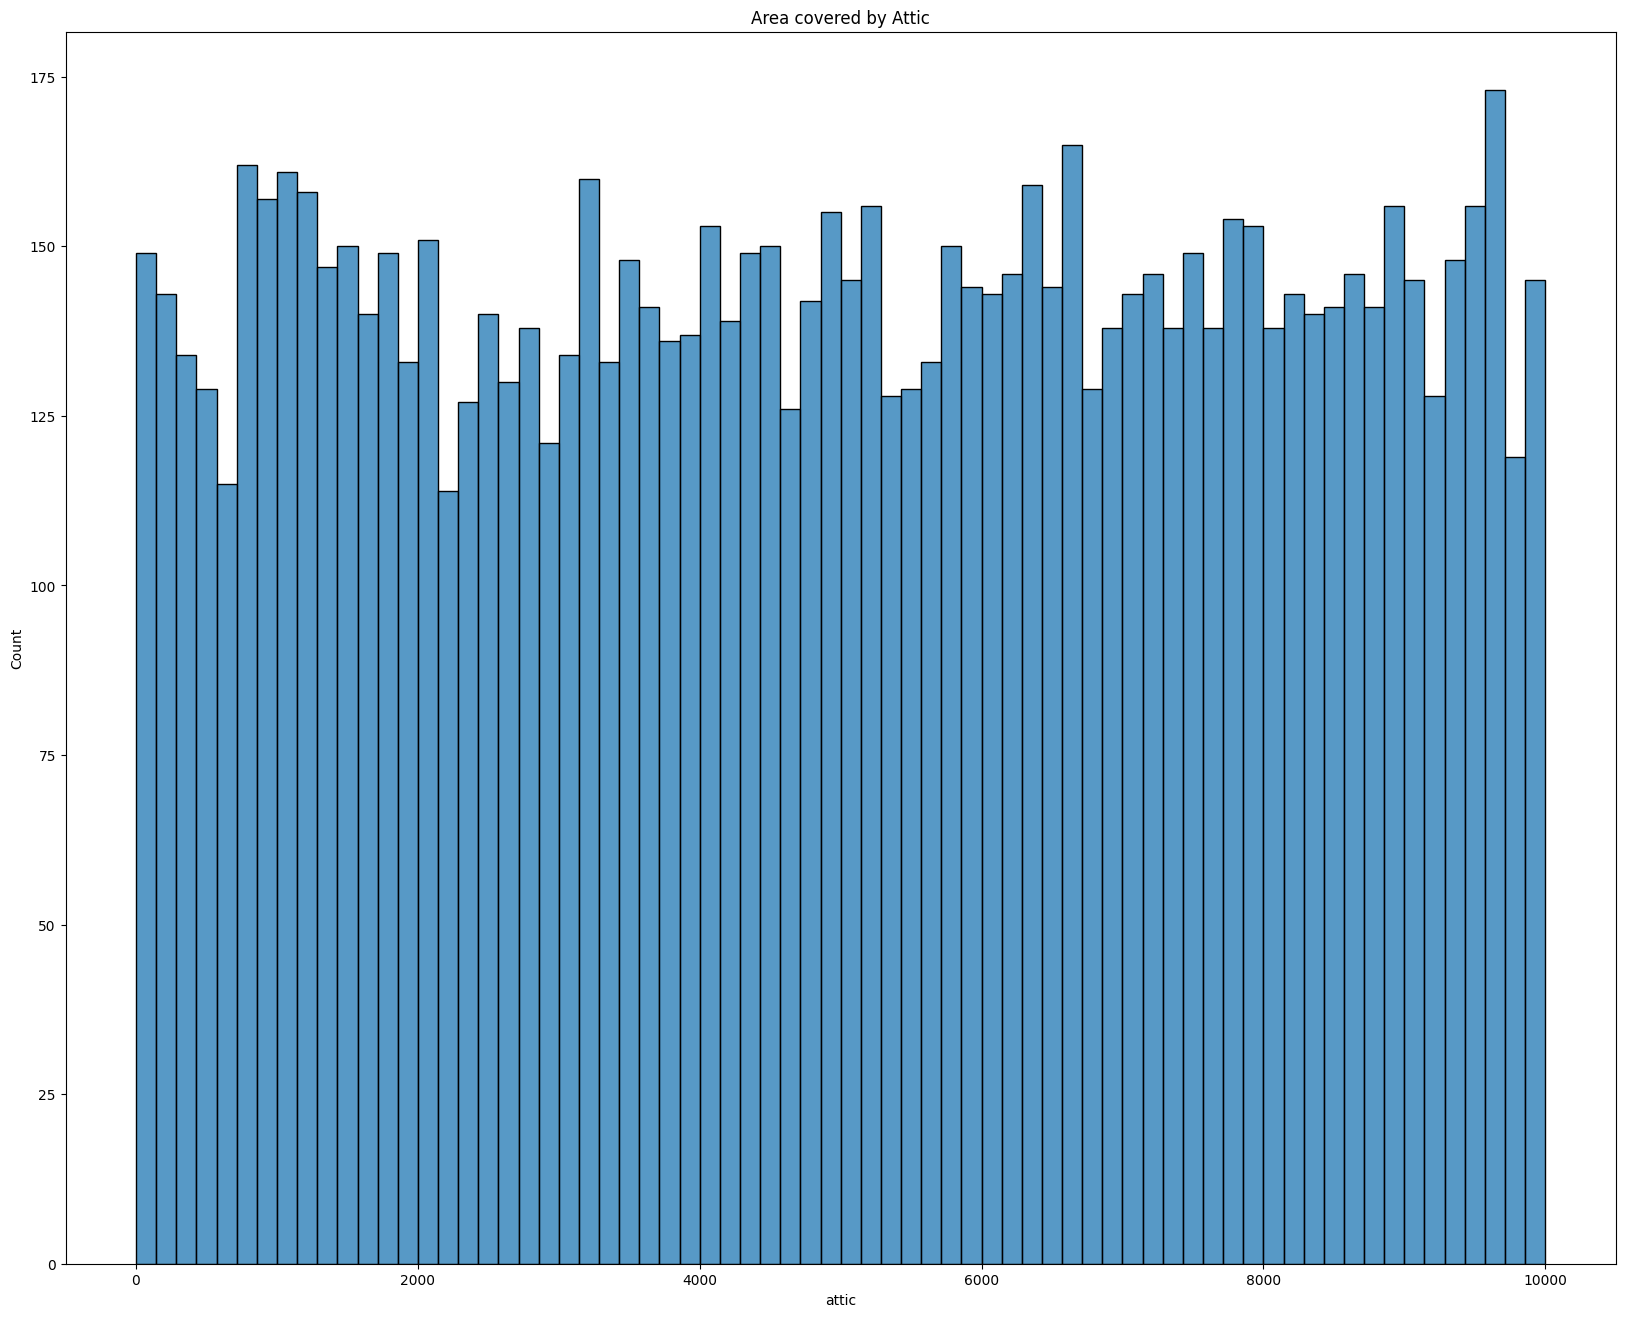

In [53]:
plt.figure(figsize=(20,16))
sns.histplot(data['attic'], bins=70)
plt.title('Area covered by Attic')
plt.show()

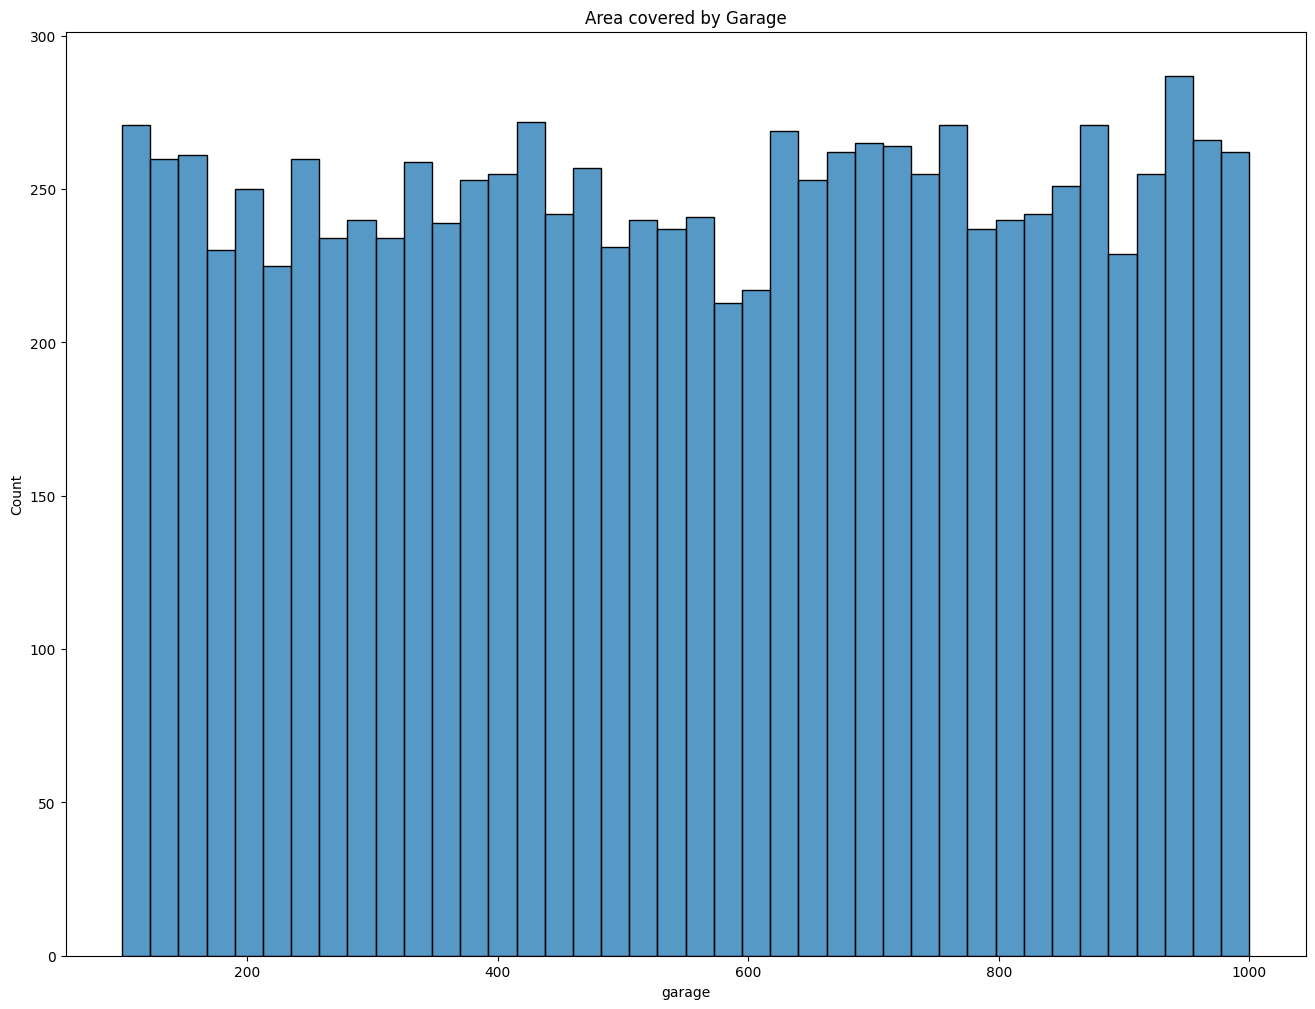

In [54]:
plt.figure(figsize=(16,12))
sns.histplot(data['garage'], bins=40)
plt.title('Area covered by Garage')
plt.show()

In [55]:
current_year=datetime.datetime.now().year
data['ageOfProperty']=current_year - data['made']
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


In [56]:
X = data.drop('price', axis=1)
y = data['price']

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=32)


In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

accuracy = sum( abs( y_test - y_pred) / y_test < 0.1) / len(y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f"Accuracy: {accuracy}%")

Mean Absolute Error: 1488.7474985716728
Mean Squared Error: 3630907.470177461
Root Mean Squared Error: 1905.4940226034457
R^2 Score: 0.9999995498908612
Accuracy: 99.96666666666667%


In [59]:
# Trying Another Method
Dependent = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
            'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
            'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
            'hasGuestRoom', 'ageOfProperty']
Independent = 'price'

X = data[Dependent]
Y = data[Independent]

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)

In [61]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [62]:
Y_pred = model.predict(X_test)

In [63]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

accuracy = sum( abs( Y_test - Y_pred) / Y_test < 0.1) / len(Y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f"Accuracy: {accuracy}%")

Mean Absolute Error: 1463.1297827592261
Mean Squared Error: 3532973.304956116
Root Mean Squared Error: 1879.620521529842
R^2 Score: 0.9999995785978737
Accuracy: 99.93333333333332%
